In [10]:
rm(list=ls()) #clear all variables and packages
# Install and load packages
library(ggplot2)
install.packages("gridExtra", repos="http://cran.rstudio.com/")
library(gridExtra)
library(scales)


The downloaded source packages are in
	‘/private/var/folders/v9/6_3q92b512q408c7y9_mw55h0000gn/T/RtmpQv1JS7/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [12]:
### inputting the streaming dataframe ###

stream.data <- read.table("~/git/ep-streaming/output/streaming/2016-06-08-full-thru-diginorm/parsed.times", header = F, sep = " ")
names(stream.data) <- c("Steps", "Event", "Stamp")
stream.data$Steps <- as.factor(stream.data$Steps) #converting values into factors
stream.data$Event <- as.factor(stream.data$Event)
stream.data$Stamp <- as.numeric(stream.data$Stamp)

streamingsteps <- length(levels(stream.data$Steps)) # handy variable for later

In [16]:
# create data (type==matrix) to fake 'distributions'

fake.stream.data <- data.frame(matrix(NA, nrow = (streamingsteps)*6, ncol = 3, dimnames = list(NULL,c('Steps','Time','Method'))))
fake.stream.data$Steps <- c(rep(levels(stream.data$Steps), each=6))
fake.stream.data$Method <- c(rep('Streaming', streamingsteps*6))

# repeat start and end times five times

for (each in levels(stream.data$Steps)) {
  start.incident <- which(stream.data$Steps==each & stream.data$Event=='START')
  done.incident <- which(stream.data$Steps==each & stream.data$Event=='DONE')
  fake.stream.data[which(fake.stream.data$Steps==each & fake.stream.data$Method=='Streaming'),2] <- c(rep(stream.data[start.incident,3],3),rep(stream.data[done.incident,3],3)) 
}

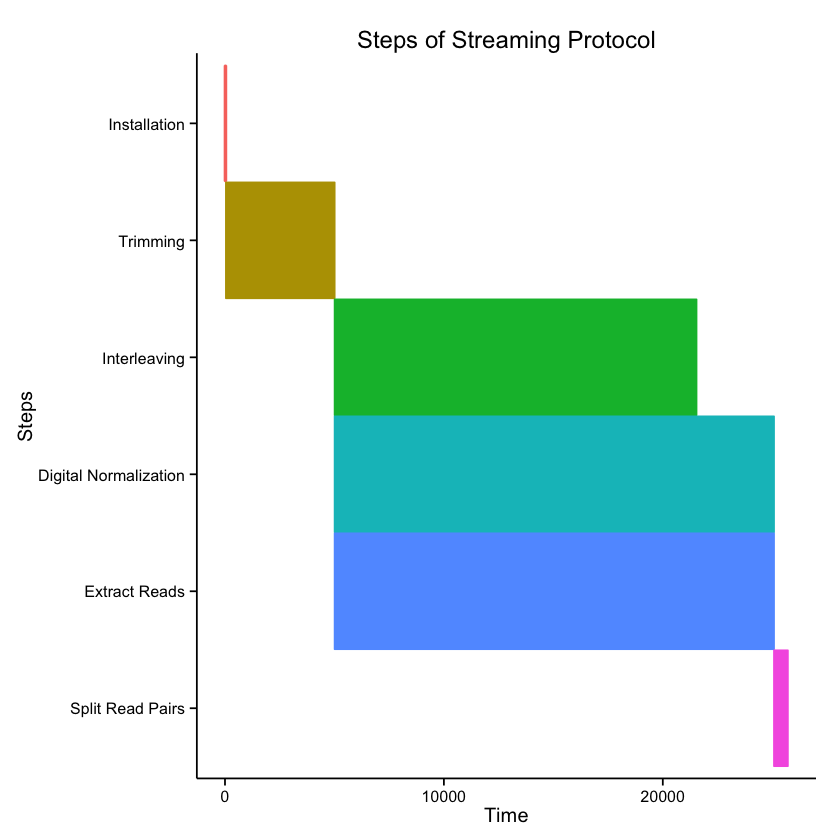

In [97]:
# designate pipeline steps as factors

fake.stream.data$Steps <- as.factor(fake.stream.data$Steps)
fake.stream.data$Time <- as.numeric(fake.stream.data$Time)

# create step names manually
#fake.stream.data$Steps <- factor(labels = c("Installation", "Trimming", "Interleaving", "Digital Normalization", "Extract Reads", "Split Read Pairs"))
#stream.step.names <- c("Installation", "Trimming", "Interleaving", "Digital Normalization", = "Extract Reads","Split Read Pairs")


### build the plot, color by step
# coords will be flipped, steps on x

plot <- ggplot(fake.stream.data, aes(x=Steps, y=Time, color=Steps)) + ggtitle ("Steps of Streaming Protocol")
plot <- plot + geom_boxplot(aes(fill = factor(Steps)), width = 1.32)

# order steps by number

plot <- plot + scale_x_discrete(limits = rev(levels(fake.stream.data$Steps)), labels = rev(c("Installation", "Trimming", "Interleaving", "Digital Normalization", "Extract Reads", "Split Read Pairs")))  
plot <- plot + coord_flip()
 
plot + theme_classic() + theme(legend.position="none")